# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Load Data

In [2]:
df = pd.read_csv("Admission_Predict.csv")

# 3. Exploratory Data Analysis (EDA)

In [3]:
print("First 5 rows:")
print(df.head())

First 5 rows:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [4]:
print("Info:")
print(df.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB
None


In [5]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.00

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


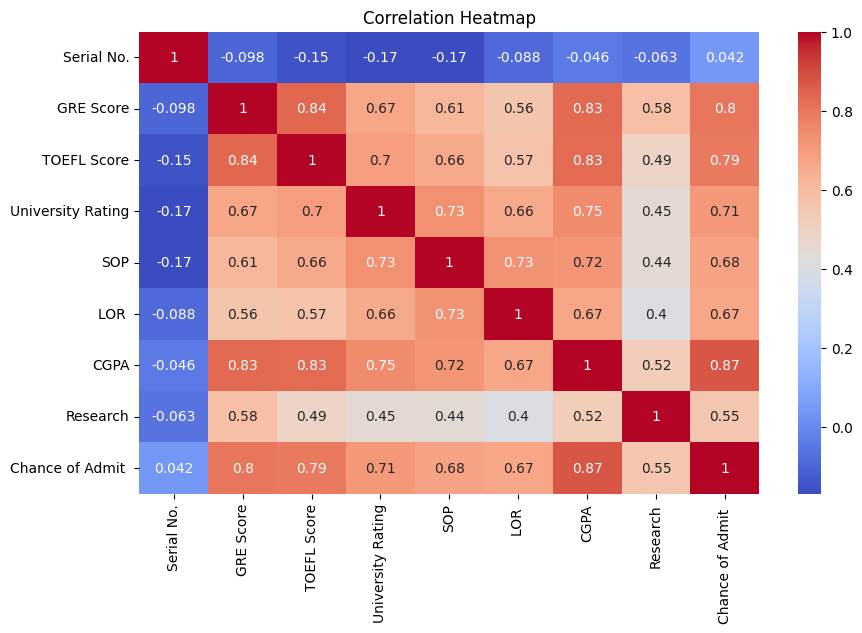

In [7]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 4. Data Preprocessing

In [8]:
if 'Serial No.' in df.columns:
    df = df.drop('Serial No.', axis=1)

X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 5. Models

In [9]:
results = {}
predictions = pd.DataFrame({"Actual": y_test.values})

### 1. Linear Regression

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results["Linear Regression"] = {
    "MAE": mean_absolute_error(y_test, y_pred_lr),
    "MSE": mean_squared_error(y_test, y_pred_lr),
    "R2 Score": r2_score(y_test, y_pred_lr)
}
predictions["Linear_Regression"] = y_pred_lr

### 2. Random Forest

In [11]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results["Random Forest"] = {
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "MSE": mean_squared_error(y_test, y_pred_rf),
    "R2 Score": r2_score(y_test, y_pred_rf)
}
predictions["Random_Forest"] = y_pred_rf

### 3. Support Vector Machine (SVR)

In [12]:
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
results["SVM"] = {
    "MAE": mean_absolute_error(y_test, y_pred_svm),
    "MSE": mean_squared_error(y_test, y_pred_svm),
    "R2 Score": r2_score(y_test, y_pred_svm)
}
predictions["SVM"] = y_pred_svm

# 6. Model Evaluation

In [13]:
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", results_df)


Model Comparison:
                         MAE       MSE  R2 Score
Linear Regression  0.047957  0.004617  0.821208
Random Forest      0.049779  0.004929  0.809110
SVM                0.066485  0.006466  0.749596


# 7. Visualization of Predictions

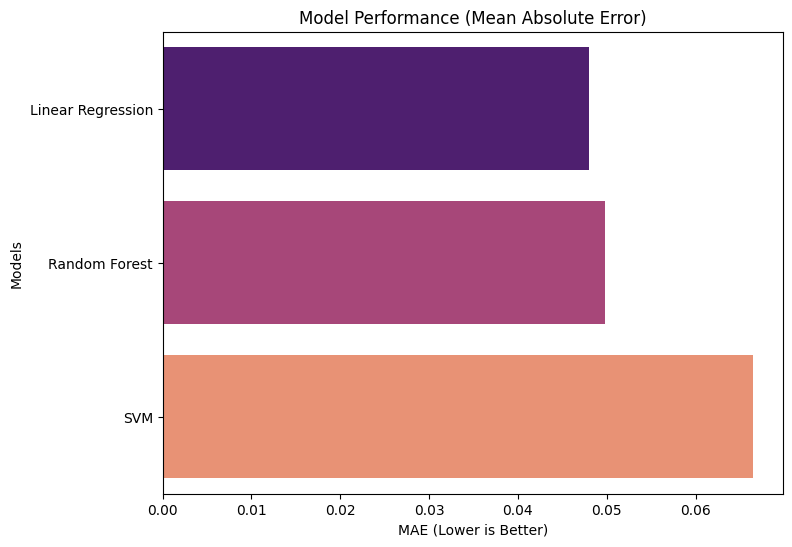

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x="MAE", y=results_df.index, hue=results_df.index,data=results_df, palette="magma", legend=False)
plt.title("Model Performance (Mean Absolute Error)")
plt.xlabel("MAE (Lower is Better)")
plt.ylabel("Models")
plt.show()

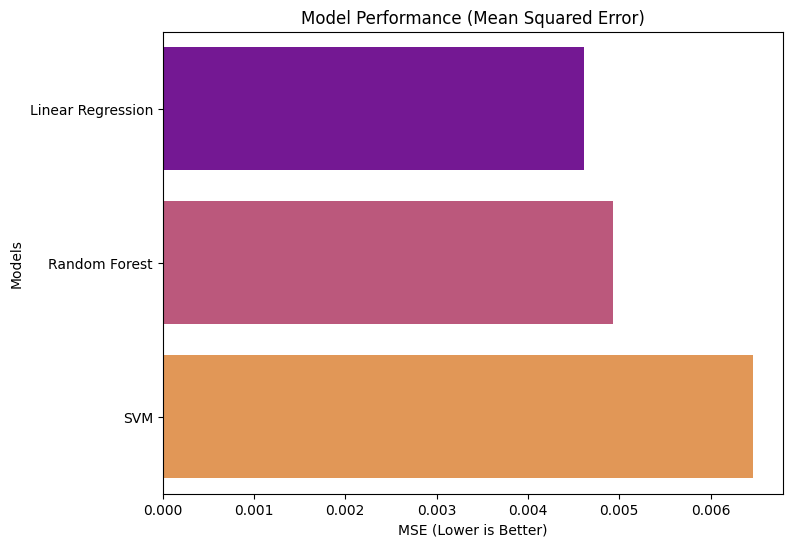

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x="MSE", y=results_df.index, hue=results_df.index,data=results_df, palette="plasma", legend=False)
plt.title("Model Performance (Mean Squared Error)")
plt.xlabel("MSE (Lower is Better)")
plt.ylabel("Models")
plt.show()

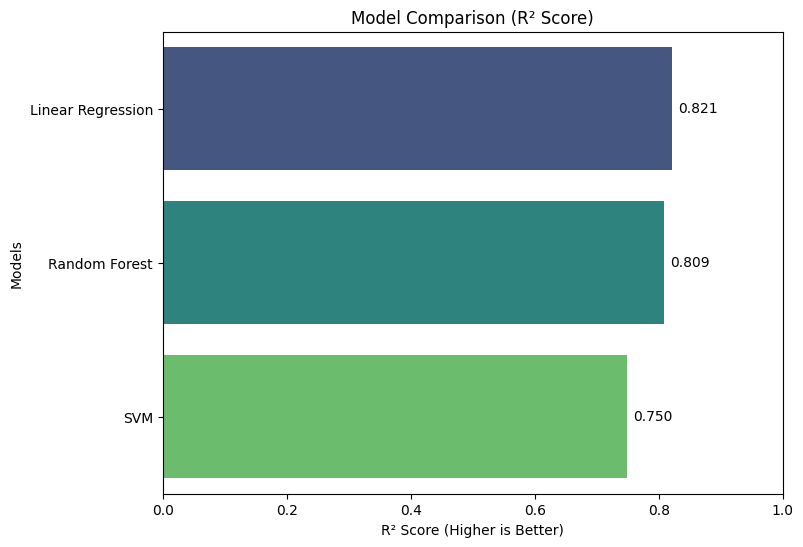

 Best Model: Linear Regression with R² Score = 0.821


In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x="R2 Score", y=results_df.index, hue=results_df.index,data=results_df, palette="viridis", legend=False)
for index, value in enumerate(results_df["R2 Score"]):
    plt.text(value + 0.01, index, f"{value:.3f}", va='center')

plt.title("Model Comparison (R² Score)")
plt.xlabel("R² Score (Higher is Better)")
plt.ylabel("Models")
plt.xlim(0, 1) 
plt.show()

best_model = results_df["R2 Score"].idxmax()
best_score = results_df["R2 Score"].max()

print(f" Best Model: {best_model} with R² Score = {best_score:.3f}")

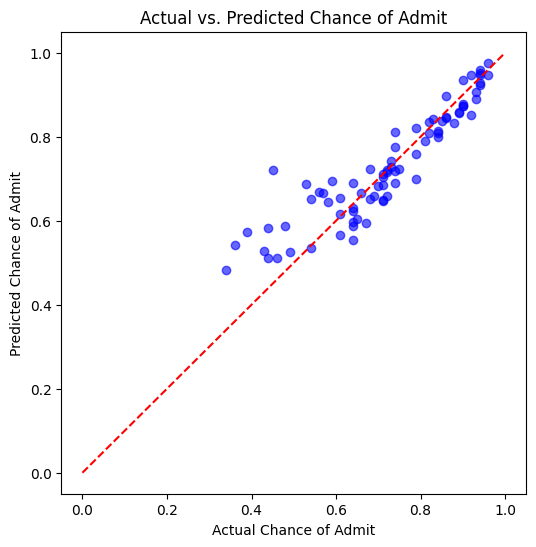

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color="blue")
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs. Predicted Chance of Admit")
plt.plot([0,1],[0,1], color="red", linestyle="--") 
plt.show()

# 8. Predicting for New Student Details

In [22]:
new_student = {
    "GRE Score": 320, #GRE Score: 310–340
    "TOEFL Score": 110, #TOEFL Score: 90–120
    "University Rating": 4, #University Rating: 1–5
    "SOP": 4.5, #SOP: 1–5
    "LOR ": 4.0, #LOR : 1–5
    "CGPA": 9.2, #CGPA: 6.0–10.0
    "Research": 0 #Research: 0 (No) / 1 (Yes)
}

new_df = pd.DataFrame([new_student])

new_scaled = scaler.transform(new_df)

predicted_chance = lr.predict(new_scaled)[0]

print(f"Predicted Chance of Admission: {predicted_chance:.2f}")


Predicted Chance of Admission: 0.81


# 9. Export for Power BI

In [19]:
df.to_csv("cleaned_dataset.csv", index=False)
results_df.to_csv("model_comparison.csv")
predictions.to_csv("predictions.csv", index=False)

print("Files saved for Power BI: cleaned_dataset.csv, model_comparison.csv, predictions.csv")

Files saved for Power BI: cleaned_dataset.csv, model_comparison.csv, predictions.csv


# 10. For App Visualization

In [20]:
import pickle

pickle.dump(lr, open("lr.pkl", "wb"))

pickle.dump(scaler, open("scaler.pkl", "wb"))
